# Hello World
Some Document About Code

In [88]:
# import libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [89]:
# load goemotions.json into data
with open("goemotions.json") as f:
    data = json.load(f)

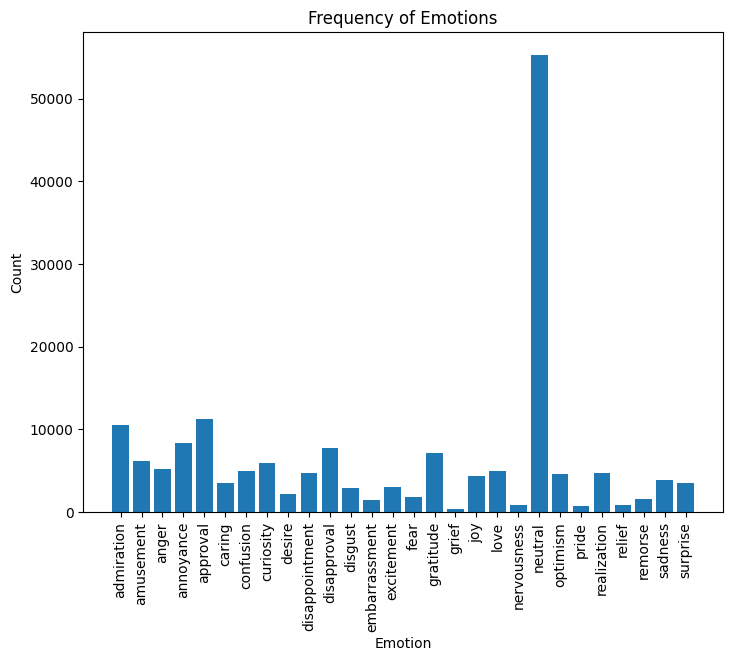

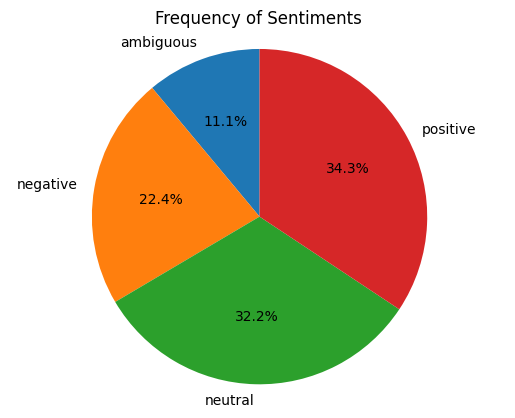

In [90]:
# Question 1.3
# create arrays for emotions and sentiments
bignumpy = np.asarray(data)
allemotions = bignumpy[:,1]
allsentiments = bignumpy[:,2]

# count the frequencies of all emotions and display in bar graph
emotions, counts = np.unique(allemotions, return_counts=True)
fig_bar = plt.figure()
ax1 = fig_bar.add_axes([0,0,1,1])
ax1.bar(emotions,counts)
plt.xticks(rotation=90)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Frequency of Emotions')
plt.show()
fig_bar.savefig('emotions-hist.pdf', bbox_inches='tight')

# count the frequencies of all sentiments and display in pie chart
sentiments, counts = np.unique(allsentiments, return_counts=True)
fig_pie = plt.figure()
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Frequency of Sentiments')
plt.show()
fig_pie.savefig('sentiments-pie.pdf', bbox_inches='tight')

In [91]:
# Question 2.1
corpus = bignumpy[:,0]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Number of tokens =", len(vectorizer.get_feature_names_out()))
# print(X.toarray())

y = vectorizer.fit_transform(allemotions)
print("Emotions from original dataset numbered from 0 to 27 (refer to the bar graph 'Frequency of Emotions' for the order)")
print(y.nonzero()[1])
y_emo = y.nonzero()[1]

y = vectorizer.fit_transform(allsentiments)
print("Sentiments from original dataset numbered from 0 to 3 with 0=ambiguous, 1=negative, 2=neutral and 3=positive")
print(y.nonzero()[1])
y_sent = y.nonzero()[1]

# print(y.toarray())


Number of tokens = 30449
Emotions from original dataset numbered from 0 to 27 (refer to the bar graph 'Frequency of Emotions' for the order)
[26 20 18 ...  5  0  2]
Sentiments from original dataset numbered from 0 to 3 with 0=ambiguous, 1=negative, 2=neutral and 3=positive
[1 2 3 ... 3 3 1]


In [92]:
# Question 2.2

X_emo_train, X_emo_test, y_emo_train, y_emo_test = train_test_split(X, y_emo, test_size=0.2, random_state=0)
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(X, y_sent, test_size=0.2, random_state=0)


# Reddit post words
print("Size of training data set X: ") # there is no need to print the dataset fro question 2.2 to be removed in final
print(X_emo_train.shape)               # version for submission
print("Size of testing data set X: ")
print(X_emo_test.shape)

# Emotions
print("Size of training data set for emotions, y: ")
print(y_emo_train.shape)

print("Size of testing data set for emotions, y: ")
print(y_emo_test.shape)

# Sentiment
print("Size of training data set for sentiment, y: ")
print(y_sent_train.shape)

print("Size of testing data set for sentiment, y: ")
print(y_sent_test.shape)

# mymessagetest = "I am so happy to be here! let's go!"

Size of training data set X: 
(137456, 30449)
Size of testing data set X: 
(34364, 30449)
Size of training data set for emotions, y: 
(137456,)
Size of testing data set for emotions, y: 
(34364,)
Size of training data set for sentiment, y: 
(137456,)
Size of testing data set for sentiment, y: 
(34364,)


In [6]:
# Question 2.3.1 - Naive Bayes

# Emotions
clf = MultinomialNB()
clf.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = clf.predict(X_emo_test)
print("Accuracy % of Multinomial Naive Bayes Classification on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)
print("Predicted emotions:",y_emo_pred)
print("Actual emotions:",y_emo_test)

# Sentiment
clf = MultinomialNB()
clf.fit(X_sent_train, y_sent_train)

# Obtaining the prediction based on the model
y_sent_pred = clf.predict(X_sent_test)
print("Accuracy % of Multinomial Naive Bayes Classification on sentiments:",metrics.accuracy_score(y_sent_test, y_sent_pred)*100)
print("Predicted sentiments:",y_sent_pred)
print("Actual sentiments:",y_sent_test)

Accuracy % of Multinomial Naive Bayes Classification on emotions: 38.444302176696546
Predicted emotions: [20 20 20 ... 20 20 20]
Actual emotions: [20 20  7 ... 20 10 14]
Accuracy % of Multinomial Naive Bayes Classification on sentiments: 54.536724479106034
Predicted sentiments: [2 2 2 ... 2 2 2]
Actual sentiments: [2 2 0 ... 2 1 1]


In [7]:
# Question 2.3.2 - Decision Tree

# Emotions
# criterion="entropy"
dtc=DecisionTreeClassifier()
dtc.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = dtc.predict(X_emo_test)
print("Accuracy % of Decision Tree on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)
print("Predicted emotions:",y_emo_pred)
print("Actual emotions:",y_emo_test)

# Sentiment
# criterion="entropy"
dtc=DecisionTreeClassifier()
dtc.fit(X_sent_train, y_sent_train)

# Obtaining the prediction based on the model
y_sent_pred = dtc.predict(X_sent_test)
print("Accuracy % of Decision Tree on sentiment:",metrics.accuracy_score(y_sent_test, y_sent_pred)*100)
print("Predicted sentiments:",y_sent_pred)
print("Actual sentiments:",y_sent_test)

print("\n\nFor emotions:")
print(classification_report(y_emo_test, y_emo_pred))

print("\n\nFor Sentiments:")
print(classification_report(y_sent_test, y_sent_pred))

Accuracy % of Decision Tree on emotions: 36.19485508089861
Predicted emotions: [ 7  4  3 ... 20 10 20]
Actual emotions: [20 20  7 ... 20 10 14]
Accuracy % of Decision Tree on sentiment: 54.42614363869165
Predicted sentiments: [0 3 1 ... 2 1 2]
Actual sentiments: [2 2 0 ... 2 1 1]


For emotions:
              precision    recall  f1-score   support

           0       0.40      0.56      0.47      2134
           1       0.42      0.57      0.48      1233
           2       0.24      0.36      0.29      1062
           3       0.16      0.22      0.18      1688
           4       0.21      0.28      0.24      2226
           5       0.18      0.24      0.21       669
           6       0.23      0.30      0.26       965
           7       0.31      0.34      0.33      1143
           8       0.24      0.28      0.26       439
           9       0.16      0.18      0.17       970
          10       0.25      0.24      0.24      1537
          11       0.25      0.22      0.23       585


In [8]:
# Question 2.3.3 - Multi-Layered Perceptron

mlpclf = MLPClassifier(max_iter=1)
mlpclf.fit(X_emo_train, y_emo_train)

# Obtaining the prediction based on the model
y_emo_pred = mlpclf.predict(X_emo_test)
print("Accuracy % of Multi-Layered Perceptron on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)
print("Predicted emotions:",y_emo_pred)
print("Actual emotions:",y_emo_test)

mlpclf.fit(X_sent_train, y_sent_train)
# Obtaining the prediction based on the model
y_sent_pred = mlpclf.predict(X_sent_test)
print("Accuracy % of Multi-Layered Perceptron on sentiment:",metrics.accuracy_score(y_sent_test, y_sent_pred)*100)
print("Predicted sentiments:",y_sent_pred)
print("Actual sentiments:",y_sent_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy % of Multi-Layered Perceptron on emotions: 43.78710278198114
Predicted emotions: [20 20 20 ... 20 20 20]
Actual emotions: [20 20  7 ... 20 10 14]
Accuracy % of Multi-Layered Perceptron on sentiment: 56.838551972995
Predicted sentiments: [2 2 2 ... 2 2 2]
Actual sentiments: [2 2 0 ... 2 1 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Question 2.3.4 - Top-MNB
param = {'alpha':[0,0.1,0.5,2]}
Multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=param)

# For Emotions
Multinomial_nb_grid.fit(X_emo_train, y_emo_train)
y_emo_pred = Multinomial_nb_grid.predict(X_emo_test)
print('Best Parameters : {}'.format(Multinomial_nb_grid.best_params_))
# print('Best Score Through Grid Search : {:.3f}\n'.format(Multinomial_nb_grid.best_score_))

# Obtaining the prediction based on the model
print("\nThe classification of the best parameter:\n\n")
print(classification_report(y_emo_test, y_emo_pred))



# For Sentiment
Multinomial_nb_grid.fit(X_sent_train, y_sent_train)\
y_sent_pred = Multinomial_nb_grid.predict(X_sent_test)
print('Best Parameters : {}'.format(Multinomial_nb_grid.best_params_))
# print('Best Score Through Grid Search : {:.3f}\n'.format(Multinomial_nb_grid.best_score_))


# Obtaining the prediction based on the model
print("\nThe classification of the best parameter:\n\n")
print(classification_report(y_sent_test, y_sent_pred))




"""
topNB = MultinomialNB()
param = {'alpha':[0,0.1,0.2,0.5]}
svc = svm.SVC() # not sure what to do with this will most likely remove
clf = GridSearchCV(topNB, param)
clf.fit(X_emo_train, y_emo_train)
y_emo_pred = clf.predict(X_emo_test)
print("Accuracy % of Top MultiNomialNB on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)
print("Predicted emotions:",y_emo_pred)
print("Actual emotions:",y_emo_test)
#print("Best alpha parameter:", clf.best_params_().toarray())

clf.fit(X_sent_train, y_sent_train)
y_sent_pred = clf.predict(X_sent_test)
print("Accuracy % of Top MultiNonmialNB on sentiment:",metrics.accuracy_score(y_sent_test, y_sent_pred)*100)
print("Predicted sentiments:",y_sent_pred)
print("Actual sentiments:",y_sent_test)
"""

SyntaxError: invalid syntax (1045416597.py, line 19)

In [ ]:
# Question 2.3.5

topDT = DecisionTreeClassifier()
param = {'criterion':('gini','entropy'), 'max_depth':[, ], 'min_samples_split'[, , ]}
clf = GridSearchCV(topDT, param)
clf.fit(X_emo_train, y_emo_train)
y_emo_pred = clf.predict(X_emo_test)
print("Accuracy % of Top MultiNomialNB on emotions:",metrics.accuracy_score(y_emo_test, y_emo_pred)*100)
print("Predicted emotions:",y_emo_pred)
print("Actual emotions:",y_emo_test)

In [33]:
# Question 3.1
import nltk
import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

In [35]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')




[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [178]:
# test for Question 3.2
tokens = []
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0

for word in corpus:
    tokens.append(nltk.word_tokenize(word))

X_emo_train, X_emo_test, y_emo_train, y_emo_test = train_test_split(tokens, y_emo, test_size=0.2, random_state=0)
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(tokens, y_sent, test_size=0.2, random_state=0)

for token in X_emo_train:
    count_1 = count_1 + len(token)
    

for token in X_emo_test:
    count_2 = count_2 + len(token)
    
for token in tokens:
    count_3 = count_3 + len(token)
    
    
print("Total number of tokens for the corpus train:",count_1)
print("Total number of tokens for the corpus test: ",count_2)
print("Total number of tokens for the total corpus: ",count_3)

Total number of tokens for the corpus train: 2112422
Total number of tokens for the corpus test:  529706
Total number of tokens for the total corpus:  2642128


In [189]:
# Question 3.3 - Average of embedening words
average = []
y_average = []
count_hit_rates = 0
count_missed_rates = 0

for j in range(len(X_emo_train)):
    count_average = 0
    vec_cameroon_sum = 0
    for i in range(len(X_emo_train[j])):
        try:
            vec_cameroon_sum = wv[X_emo_train[j][i]] + vec_cameroon_sum
            count_hit_rates = count_hit_rates + 1
            count_average = count_average + 1 
            # print(vec_cameroon_sum[0])
            # print(i)
            # print(f"{vec_cameroon}\n\n\n")
        except KeyError:
            count_missed_rates = count_missed_rates + 1
            # print(f"The word {tokens[j][i]} does not appear in this model")
    if count_average != 0:
        average.append(vec_cameroon_sum / count_average)
        y_average.append(y_emo_train[j])

# print(f"\n\n\n{average}")
# print(count_average)

#print(average[0])
#print(len(average))
#print(count_hit_rates)
#print(count_missed_rates)
#print(len(y_average))
print("overall hit rate of training = ",(count_hit_rates/count_1)*100, " %")

137380
1635846
476576
137380
overall hit rate of training =  77.43935634073115  %
